In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
#IMPORTING DATA
data=pd.read_csv("C:/Users/DELL/Downloads/code/insuranceFraud.csv")
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
data=data.replace('?',np.nan)

In [4]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

Therefore collision_type , property_damage, police_report_available only have missing data

In [5]:
data['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [6]:
#REMOVING UNNECESSARY VARIABLES

#Here we assume that place as well as date have no influence on making fraudulant claims

#city
data.drop(['policy_number','policy_bind_date','total_claim_amount','policy_state','insured_zip','insured_hobbies','incident_date','incident_state','incident_location','auto_make','auto_model','auto_year'],
          axis=1,inplace=True)

<AxesSubplot:>

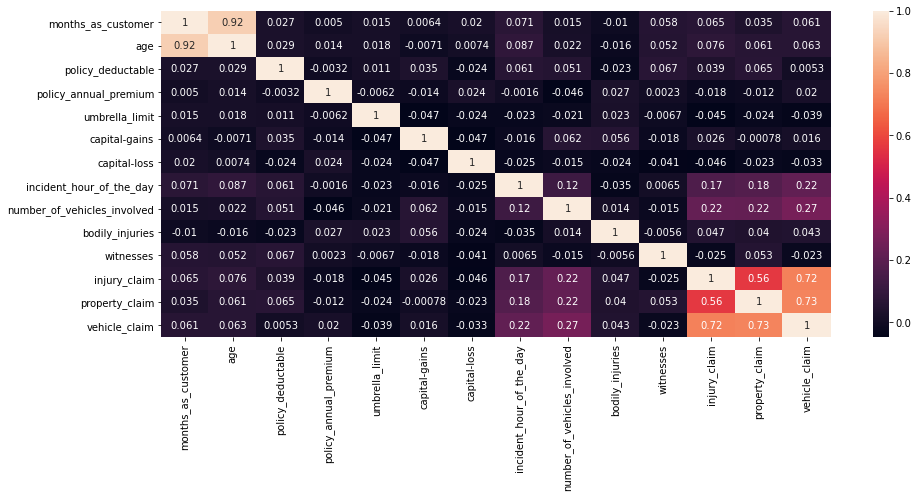

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)

## HANDLING CATEGORICAL MISSING VALUES

In [8]:
from feature_engine.imputation import CategoricalImputer as cati
imputer=cati()

In [9]:
data['collision_type'] = imputer.fit_transform(pd.DataFrame(data['collision_type']))
data['collision_type'].value_counts() 

Rear Collision     292
Side Collision     276
Front Collision    254
Missing            178
Name: collision_type, dtype: int64

In [10]:
data['property_damage'] = imputer.fit_transform(pd.DataFrame(data['property_damage']))
data['property_damage'].value_counts() 

Missing    360
NO         338
YES        302
Name: property_damage, dtype: int64

In [11]:
data['fraud_reported']=data['fraud_reported'].map(dict(Y=1, N=0))

In [12]:
data['police_report_available'] = imputer.fit_transform(pd.DataFrame(data['police_report_available']))
data['police_report_available'].value_counts() 

Missing    343
NO         343
YES        314
Name: police_report_available, dtype: int64

## RANKING ORDINAL CATEGORICAL VARIABLES AND YES/NO VARIABLES

In [13]:
print(data['policy_csl'].unique())
print(data['insured_education_level'].unique())
print(data['incident_severity'].unique())


['250/500' '100/300' '500/1000']
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']


In [14]:
cat_df=data.select_dtypes(include=['O']).copy()

In [15]:
cat_df['policy_csl']=cat_df['policy_csl'].map({'250/500':2.5, '100/300':1 ,'500/1000':5})
cat_df['insured_education_level']=cat_df['insured_education_level'].map({'MD': 7 ,'PhD':5 ,'Associate':4, 'Masters':3, 'High School':1 ,'College':2, 'JD':6})
cat_df['incident_severity']=cat_df['incident_severity'].map({'Major Damage':3, 'Minor Damage':2, 'Total Loss':4, 'Trivial Damage':1})
cat_df['insured_sex']=cat_df['insured_sex'].map({'MALE':1,'FEMALE':0})
cat_df['property_damage']=cat_df['property_damage'].map({'YES':1,'NO':0,'NaN':0})
cat_df['police_report_available']=cat_df['police_report_available'].map({'YES':1,'NO':0,'NaN':0})

In [16]:
for col in cat_df.drop(['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available'],axis=1):
    cat_df=pd.get_dummies(cat_df,columns=[col],prefix=[col],drop_first=True)

In [17]:
cat_df=cat_df.fillna(0)
#Here we assume that for values not known we assume that it did not occur

In [18]:
num_df=data.select_dtypes(include=['int64','float64']).copy()

In [19]:
final_data=pd.concat([num_df,cat_df],axis=1)

In [20]:
x=final_data.drop('fraud_reported',axis=1)
y=final_data['fraud_reported']

<AxesSubplot:xlabel='months_as_customer', ylabel='age'>

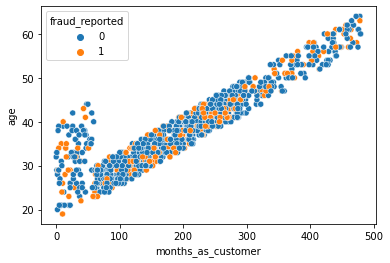

In [21]:
sns.scatterplot(x='months_as_customer',y='age',hue='fraud_reported',data=final_data)

We see that a lot of fraudulent claims are made by early customers though it is also made by latter customers. Also we see that there are no new customers who are older than age 45.

In [22]:
x=x.drop(['age'],axis=1)

## Oversampling

In [34]:
from imblearn.combine import SMOTETomek as st 

In [41]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

smt = SMOTETomek(random_state = 42)
x_res, y_res = smt.fit_resample(x, y)


In [43]:
y_res.value_counts()

0    702
1    702
Name: fraud_reported, dtype: int64

Therefore we see that number of values of fraud and non fraud are equalised

### Testing different models

In [45]:
#Importing packages
from numpy import loadtxt
from xgboost import XGBClassifier as xgb
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acs

In [46]:
#Importing models
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as rfc

In [47]:
#Splitting the data taking random state as 101
x_train,x_test,y_train,y_test=tts(x_res,y_res,test_size=0.3,random_state=101)

In [50]:
#Running each model

models=[]
models.append(('LogisticRegression',lr()))
models.append(('KNN',knc()))
models.append(('SVM',SVC()))
models.append(('RandomForest',rfc()))
models.append(('XGB',xgb()))

import time

In [52]:
#Evaluating each model in turn

from sklearn.metrics import accuracy_score

results=[]
names=[]
scoring="accuracy"

for name, model in models:
    start_time=time.time()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    predictions=[round(value) for value in y_pred]
    
    #Evaluating predictions
    
    accuracy = accuracy_score(y_test,predictions)
    print("accuracy : %2f%%" % (accuracy*100),name)
    print("---%s seconds ---" % (time.time()-start_time))    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy : 58.530806% LogisticRegression
---0.11768436431884766 seconds ---
accuracy : 69.431280% KNN
---0.0646677017211914 seconds ---
accuracy : 52.606635% SVM
---0.2539968490600586 seconds ---
accuracy : 89.336493% RandomForest
---0.49050164222717285 seconds ---
[13:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


accuracy : 86.966825% XGB
---0.5701184272766113 seconds ---


Therefore we see that random forest and XGB gives the highest accuracy

## XGBOOST HYPERPARAMETERIZATION

In [53]:
params={
    "learning_rate":[0.05,0.1,0.15,0.2,0.25,0.3],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]   
}

In [54]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier= xgboost.XGBClassifier()

In [55]:
random_search= RandomizedSearchCV(classifier,params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [56]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [57]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
predictions2=random_search.predict(x_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       216
           1       0.88      0.89      0.88       206

    accuracy                           0.89       422
   macro avg       0.89      0.89      0.89       422
weighted avg       0.89      0.89      0.89       422



## Random Forest Hyperparameter Tuning

In [60]:
reg_rf = rfc()

In [61]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2, 5, 10,14,20]
min_samples_leaf = [1, 2, 4,6,8,10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 14, 20], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'criterion': ['entropy', 'gini']}


In [62]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid,
                              scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,random_state=42
                              )

In [63]:
rf_random.fit(x_train,y_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25,
 'criterion': 'gini'}

In [64]:
prediction3=rf_random.predict(x_test)
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       216
           1       0.90      0.88      0.89       206

    accuracy                           0.89       422
   macro avg       0.89      0.89      0.89       422
weighted avg       0.89      0.89      0.89       422



Therefore we see that Random Forest with hyperparameter tuning gives that best result.

However we can use any either of the model as we see f1 score of around 0.89 for both , with high accuracy which means that we can predict 90 % of the data of claims from this...